### Problem setting
we consider a three stage multi-item news-vendor problem
1) First stage: agents require certain units of fix-investment from agents <br>
&emsp;variable:<br>
&emsp;&emsp; &emsp;$ x_1 $:vector - units of items to stock<br>
&emsp;coeffients:<br>
&emsp;&emsp; &emsp;$ c_1 $:vector - costs for stocking each unit<br>
            
2) Second stage: vendor buys news paper from agent, the available quantity range depends on the invesment <br>
&emsp;  variable:<br>
&emsp; &emsp; &emsp; $ x_2 $:vector - units of items to stock more<br>
&emsp; &emsp; &emsp; $ r_2 $:vector - remain quantity after retailing befor restocking<br>
&emsp; coeffients:<br>
&emsp; &emsp; &emsp; $ c_2 $:vector - costs for restocking <br>
&emsp; random variable:<br>
&emsp; &emsp; &emsp; $ d_2 $:vector - demands of items<br>
&emsp; &emsp; &emsp; $ p_2 $:vector - retail price of items

3) Third stage: vendor sells news paper to individuals<br>
&emsp;  random variables:<br>
&emsp; &emsp; &emsp; $ d_3 $:vector - demands of items <br>
&emsp; &emsp; &emsp; $ p_3 $:vector - retail price of items

#### Stage Scenario Data

In [10]:
# Let's say the problem

# with 5 items to stock and retail
n_item = 10

# with 4 scenario in second stage
S_scenario = 5
L_scenario = 5



import numpy as np
import numpy.random as random 
# budge at first 
b_1 = n_item*random.randint(low=5,high = 10)

# additional budget 
b_2 = n_item*random.randint(low=5,high = 10)


# costs
c_1 = random.randint(low=1,high = 10, size = n_item)
c_2 = random.randint(low=1,high = 10, size = n_item)



# price
p_2 = c_1 + random.randint(low=1,high = 10, size = n_item)
p_3 = c_1 + random.randint(low=1,high = 10, size = n_item)

# damands
d_2 = [random.randint(low=1,high = 10, size = n_item) for i in range(S_scenario)]
d_3_scenario_wrap = [[random.randint(low=1,high = 10, size = n_item) \
                          for j in range(L_scenario)]\
                                 for i in range(S_scenario)]
# Probabilities
d_2_prob = random.random_sample((S_scenario,))
d_2_prob = d_2_prob/np.sum(d_2_prob)
d_3_prob_wrap = [random.random_sample((L_scenario,)) for i in range(S_scenario) ]
d_3_prob_wrap = [ row/np.sum(row) for row in d_3_prob_wrap]

In [12]:
'''
Template of scenario data structure
:: dictionary
scenario['stage_n'] = {
    'dc_var':['x_1'],
    'rd_var':[],
    'cf':{'b_1':b_1,'c_1':c_1},
    'conditions':[],
    'conditions_val':[],
    'rd_prob':{}
}
'''

scenario = {'n_item':n_item,
            'S_scenario':S_scenario,
            'L_scenario':L_scenario
           }

scenario['stage_1'] = {
    'dc_var':['x_1'],
    'rd_var':[],
    'cf':{'b_1':b_1,'c_1':c_1},
    'condition':[],
    'conditions_val':[],
    'rd_prob':{}
}

scenario['stage_2'] = {
    'dc_var':['x_2','r_2'],
    'rd_var': ['d_2'],
    'cf':{'b_2':b_2,'c_2':c_2,'p_2':p_2},
    'condition': [],
    'conditions_val': [],
    'rd_prob':{
        0:(d_2,d_2_prob)
    }
}

scenario['stage_3'] = {
    'dc_var':[],
    'rd_var': ['d_3'],
    'cf':{'p_3':p_3},
    'condition': ['d_2'],
    'conditions_val': [d_2],
    'rd_prob':{
        i:(d_3_scenario_wrap[i],d_3_prob_wrap[i]) for i in range(len(d_3_scenario_wrap)) 
    }
}

In [13]:
scenario

{'n_item': 10,
 'S_scenario': 5,
 'L_scenario': 5,
 'stage_1': {'dc_var': ['x_1'],
  'rd_var': [],
  'cf': {'b_1': 50, 'c_1': array([6, 1, 5, 5, 4, 9, 9, 3, 1, 5])},
  'condition': [],
  'conditions_val': [],
  'rd_prob': {}},
 'stage_2': {'dc_var': ['x_2', 'r_2'],
  'rd_var': ['d_2'],
  'cf': {'b_2': 90,
   'c_2': array([3, 4, 8, 4, 8, 2, 4, 9, 8, 9]),
   'p_2': array([12,  9,  8,  7, 13, 13, 14,  9,  4,  8])},
  'condition': [],
  'conditions_val': [],
  'rd_prob': {0: ([array([3, 5, 6, 5, 9, 5, 7, 4, 9, 7]),
     array([7, 4, 6, 9, 6, 7, 7, 9, 6, 8]),
     array([8, 3, 2, 4, 2, 2, 7, 2, 9, 6]),
     array([4, 9, 5, 3, 7, 9, 9, 9, 4, 4]),
     array([6, 6, 6, 1, 4, 7, 3, 7, 7, 5])],
    array([0.22387848, 0.05187187, 0.14197236, 0.27304923, 0.30922807]))}},
 'stage_3': {'dc_var': [],
  'rd_var': ['d_3'],
  'cf': {'p_3': array([14,  9,  7, 14,  9, 11, 16, 10,  9,  9])},
  'condition': ['d_2'],
  'conditions_val': [[array([3, 5, 6, 5, 9, 5, 7, 4, 9, 7]),
    array([7, 4, 6, 9, 6, 7, 7,

#### Benchmark of reward $Y$ for a given policy of $x_2$
Specifically,  $x_2(x_1, \xi^2_i)$<br>
$x_1$ is a real value vector and $x_2$ is function responding to scenarios and first decision<br>
No SSD contraints to consider

In [14]:
 ### policy example ###
def x_2_policy(x_1, s):
    return x_1

# a simple policy to order the same as previous 

In [15]:
import gurobipy as gp
from gurobipy import GRB
from collections import defaultdict
from gurobipy import quicksum as qsum

def three_stage_problem_no_SSD(scenario, return_model=False):
    n_item = scenario['n_item']
    S_scenario = scenario['S_scenario']
    L_scenario = scenario['L_scenario']
    d_2 = scenario['stage_2']['rd_prob'][0][0]
    prob_of_d_2 =  scenario['stage_2']['rd_prob'][0][1]
    
    d_3 = {}
    for s in range(S_scenario):
        d_3[s] = {}
        for l in range(L_scenario):
            d_3[s][l] = scenario['stage_3']['rd_prob'][s][0][l]
    
    prob_of_d_3 = {}
    for s in range(S_scenario):
        prob_of_d_3[s] = {}
        for l in range(L_scenario):
            prob_of_d_3[s][l] = scenario['stage_3']['rd_prob'][s][1][l]
    
    c_1 = scenario['stage_1']['cf']['c_1']
    c_2 = scenario['stage_2']['cf']['c_2']
    p_2 = scenario['stage_2']['cf']['p_2']
    p_3 = scenario['stage_3']['cf']['p_3']
    
    m = gp.Model(f'main')
    x_1 = m.addVars(n_item, vtype = GRB.CONTINUOUS, name = 'x_1')
    x_2 = {}
    for s in range(S_scenario):
        x_2[s] = m.addVars(n_item, vtype = GRB.CONTINUOUS, name = f'x_2_s={s}')
    
    # retail quantatity 
    # gurobi itself provide genral constraint to handle max or min functions  
    # which introduces extra binary variables into the model
    s_2 = {}
    for i in range(S_scenario):
        s_2[i] = m.addVars(n_item, vtype = GRB.CONTINUOUS, name = f's_2_s={i}')
        for j in range(n_item):
            m.addConstr( s_2[i][j] == gp.min_(x_1[j], constant = d_2[i][j]))
    
    # budget constraint
    tot = qsum(x_1[i]*c_1[i] for i in range(n_item))
    m.addConstr(tot<=scenario['stage_1']['cf']['b_1'], name='budget_constr_stage_1')
    
    tot_2_l = {}
    tot_2_r = {}
    for i in range(S_scenario):
        tot_2_r[i] = qsum(p_2[j]*s_2[i][j] for j in range(n_item))
        tot_2_l[i] = qsum(x_2[i][j]*c_2[j] for j in range(n_item))
        m.addConstr(tot_2_l[i]<=tot_2_r[i]+scenario['stage_2']['cf']['b_2'], \
                  name='budget_constr_stage_2')
    
    # revenue
    revenue_2 = {}
    revenue_2_expected = qsum(tot_2_r[i]*prob_of_d_2[i] for i in range(S_scenario))
    
    revenue_3_conditional_expected = {}
    s_3 = {}
    for i in range(S_scenario):
        revenue_3 = {}
        excess_3 = {}
        s_3[i] = {}
        for l in range(L_scenario):
            revenue_3[l] = 0
            excess_3[l] = m.addVars(n_item, \
                                   vtype = GRB.CONTINUOUS, \
                                   name = f'excess_3_{i}_{l}')
            s_3[i][l] = m.addVars(n_item, \
                                   vtype = GRB.CONTINUOUS, \
                                   name = f's_3_{i}_{l}')
            for j in range(n_item):
                m.addConstr( excess_3[l][j] == x_2[i][j]+x_1[j]-s_2[i][j])
                m.addConstr( s_3[i][l][j] == gp.min_(excess_3[l][j],constant = d_3[i][l][j]))
                revenue_3[l] += p_3[j]*s_3[i][l][j]
        revenue_3_conditional_expected[i] = qsum(prob_of_d_3[i][l]*revenue_3[l]\
                                                 for l in range(L_scenario))
    revenue_3_expected = qsum(revenue_3_conditional_expected[i]*prob_of_d_2[i]\
                              for i in range(S_scenario))
    revenue =  revenue_2_expected + revenue_3_expected
    
    # since budget is constrained
    # maximize revenue is equal to maximize the profit
    obj = revenue
    m.setObjective(obj, GRB.MAXIMIZE)
    m.optimize()
    if return_model:
        return [_.X for _ in x_1.values()], \
                [[_.X for _ in x_2[k].values() ] for k in range(S_scenario)]
    else:
        return obj.getValue()

In [16]:
x_1_opt,x_2_opt = three_stage_problem_no_SSD(scenario, return_model=True)
x_1_opt,x_2_opt

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 256 rows, 610 columns and 1110 nonzeros
Model fingerprint: 0x144e8236
Model has 300 general constraints
Variable types: 610 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [8e-04, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+01, 9e+01]
  GenCon const rng [1e+00, 9e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 78 rows and 191 columns
Presolve time: 0.01s
Presolved: 178 rows, 419 columns, 770 nonzeros
Found heuristic solution: objective 95.8248930
Variable types: 376 continuous, 43 integer (43 binary)

Root relaxation: objective 6.533862e+02, 121 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node

([0.0, 9.0, 0.0, 0.0, 4.0, 0.0, 0.0, 4.333333333333333, 12.0, 0.0],
 [[9.0, 3.0, 2.0, 8.0, 2.75, 9.0, 9.0, 5.666666666666667, 0.0, 5.0],
  [8.0, 2.0, 1.0, 7.0, 5.125, 9.0, 6.0, 3.0, 0.0, 7.0],
  [6.0, 2.0, 2.0, 8.0, 0.0, 9.0, 9.0, 4.666666666666667, 0.0, 3.0],
  [8.0, 3.0, 6.0, 6.0, 3.0, 6.0, 9.0, 5.888888888888889, 0.0, 5.0],
  [8.0, 3.0, 1.0, 9.0, 7.0, 7.0, 8.0, 5.0, 0.0, 4.0]])

#### Benchmark

In [17]:
import numpy as np
import math

# a benchmark from the optimal policy

# function form of x_2
def x_2(x_1, d):
    n = len(x_1)
    rst = [0 for i in range(n)]
    for i in range(n):
        rst[i] = max(x_1[i]-d[i],d[i]) if x_1[i]>d[i] else d[i]
        
def x_2_i(x_1, d):
        return max(x_1-d,d) if x_1>d else d

def ssd_benchmark_from( x_1, x_2_i, scenario):
    
    n_item = scenario['n_item']
    S_scenario = scenario['S_scenario']
    L_scenario = scenario['L_scenario']
    d_2 = scenario['stage_2']['rd_prob'][0][0]
    prob_of_d_2 =  scenario['stage_2']['rd_prob'][0][1]
    
    d_3 = {}
    for s in range(S_scenario):
        d_3[s] = {}
        for l in range(L_scenario):
            d_3[s][l] = scenario['stage_3']['rd_prob'][s][0][l]
    
    prob_of_d_3 = {}
    for s in range(S_scenario):
        prob_of_d_3[s] = {}
        for l in range(L_scenario):
            prob_of_d_3[s][l] = scenario['stage_3']['rd_prob'][s][1][l]
    
    c_1 = scenario['stage_1']['cf']['c_1']
    c_2 = scenario['stage_2']['cf']['c_2']
    p_2 = scenario['stage_2']['cf']['p_2']
    p_3 = scenario['stage_3']['cf']['p_3']
    
    
    benchmark = {}
    benchmark['stage_1'] = {
        'r': [-sum(x_1[i]*c_1[i] for i in range(n_item))],
        's': [1.0]
    }
    
    
    benchmark['stage_2'] = {
        'r': [sum(p_2[i]*min(d_2[s][i],x_1[i])-c_2[i]*x_2_i(x_1[i],d_2[s][i]) for i in range(n_item))\
                          for s in range(S_scenario)],
        's': prob_of_d_2
    }
    
    benchmark['stage_3'] = {
        'r': { 
                s:[sum(p_3[i]*min( d_3[s][l][i], x_2_i(x_1[i],d_2[s][i])) for i in range(n_item)) \
                   for l in range(L_scenario)] for s in range(S_scenario)
        },
        's': { 
                s:prob_of_d_3[s] for s in range(S_scenario)
        }
    }
    
    return benchmark

In [18]:
benchmark = ssd_benchmark_from(x_1_opt, x_2_i, scenario)
print(ssd_benchmark_from(x_1_opt, x_2_i, scenario))

{'stage_1': {'r': [-50.0], 's': [1.0]}, 'stage_2': {'r': [-209.0, -265.0, -168.0, -203.0, -143.0], 's': array([0.22387848, 0.05187187, 0.14197236, 0.27304923, 0.30922807])}, 'stage_3': {'r': {0: [363, 595, 411, 467, 527], 1: [482.0, 532.0, 427, 456.0, 444], 2: [423.3333333333333, 405.3333333333333, 493.3333333333333, 341.3333333333333, 320.3333333333333], 3: [536, 317, 502.0, 487, 543], 4: [350, 453, 351, 359, 350]}, 's': {0: {0: 0.24572219870000458, 1: 0.1820638474572161, 2: 0.31427676226668344, 3: 0.0005177259599891837, 4: 0.2574194656161067}, 1: {0: 0.07289725257720754, 1: 0.1315484050847104, 2: 0.2045035698173737, 3: 0.3252096036669896, 4: 0.2658411688537188}, 2: {0: 0.34628926019941914, 1: 0.02522141118001773, 2: 0.2796600730077995, 3: 0.18212906535288526, 4: 0.16670019025987837}, 3: {0: 0.2334218279270168, 1: 0.250395568000717, 2: 0.23645984236312073, 3: 0.06599687431497489, 4: 0.21372588739417062}, 4: {0: 0.26514016667773127, 1: 0.20328778331724603, 2: 0.2579024086238163, 3: 0.0

In [27]:
# def x_1_generator(scenario):
#     n_item = scenario['n_item']
#     c_1 = scenario['stage_1']['cf']['c_1']
#     b_1 = scenario['stage_1']['cf']['b_1']
#     while(True):
#         x_1 = random.randint(low=1,high = 10, size = n_item)
#         if sum(x_1[i]*c_1[i] for i in range(n_item))<=b_1: 
#             return x_1
# x_1_random = x_1_generator(scenario)
benchmark = ssd_benchmark_from(x_1_opt, x_2_i, scenario)

print(ssd_benchmark_from(x_1_opt, x_2_i, scenario))

{'stage_1': {'r': [-50.0], 's': [1.0]}, 'stage_2': {'r': [-209.0, -265.0, -168.0, -203.0, -143.0], 's': array([0.22387848, 0.05187187, 0.14197236, 0.27304923, 0.30922807])}, 'stage_3': {'r': {0: [363, 595, 411, 467, 527], 1: [482.0, 532.0, 427, 456.0, 444], 2: [423.3333333333333, 405.3333333333333, 493.3333333333333, 341.3333333333333, 320.3333333333333], 3: [536, 317, 502.0, 487, 543], 4: [350, 453, 351, 359, 350]}, 's': {0: {0: 0.24572219870000458, 1: 0.1820638474572161, 2: 0.31427676226668344, 3: 0.0005177259599891837, 4: 0.2574194656161067}, 1: {0: 0.07289725257720754, 1: 0.1315484050847104, 2: 0.2045035698173737, 3: 0.3252096036669896, 4: 0.2658411688537188}, 2: {0: 0.34628926019941914, 1: 0.02522141118001773, 2: 0.2796600730077995, 3: 0.18212906535288526, 4: 0.16670019025987837}, 3: {0: 0.2334218279270168, 1: 0.250395568000717, 2: 0.23645984236312073, 3: 0.06599687431497489, 4: 0.21372588739417062}, 4: {0: 0.26514016667773127, 1: 0.20328778331724603, 2: 0.2579024086238163, 3: 0.0

In [28]:
# utility tool functions
import decimal

def round2(c):
    c = decimal.Decimal(c)
    return float(round(c,6))


#### Multi-cut algorithm
we use the above result from non-SSD optimal policy as the benchmark

##### Solver for Subproblems

In [186]:
import gurobipy as gp
from gurobipy import GRB
from collections import defaultdict

def reward_problem_of_first_stage_ssd(x_1:list, z_1:float, s:int, \
                                      d_2:list,\
                                      d_3:dict,prob_of_d_3:list, 
                                      benchmark:dict,\
                                      w, \
                                      b_2, p_2, p_3, c_2):
    L_scenario = len(prob_of_d_3)
    n_item = len(p_3)
    
    itr = 0
    max_itr = 100
    
    m = gp.Model('reward_problem_two_stage_multi_item_SSD')
    m.Params.LogToConsole = 0
    
    s_2 = m.addVars(n_item, vtype = GRB.CONTINUOUS, name = 's_2')
    x_2 = m.addVars(n_item, vtype = GRB.CONTINUOUS, name = 'x_2')
    z_2 = m.addVar(lb = -float('inf'), ub = float('inf'),\
                       vtype = GRB.CONTINUOUS, name = 'z_2')
    sigma = m.addVar(lb = -float('inf'), ub = float('inf'),\
                       vtype = GRB.CONTINUOUS, name = 'sigma')
    
    pi_1 = m.addConstrs((s_2[j] <= x_1[j] for j in range(n_item)))
    m.addConstrs((s_2[j] <= d_2[j] for j in range(n_item)))
        
    f_3 = {}
    for i in range(L_scenario):
        f_3_tem = m.addVars(n_item,vtype = GRB.CONTINUOUS, name = f'f_3_l={i}')
        m.addConstrs((f_3_tem[j] <= p_3[j]*d_3[i][j] for j in range(n_item)))
        m.addConstrs((f_3_tem[j] <= p_3[j]*x_2[j] for j in range(n_item)))
        f_3[i] = qsum( f_3_tem[j] for j in range(n_item))
    obj = z_2+ qsum(f_3[l]*prob_of_d_3[l] for l in range(L_scenario))
    m.setObjective(obj,GRB.MAXIMIZE)
    
    tot_cost_2 = qsum( c_2[i]*x_2[i] for i in range(n_item))
    tot_revenue_2 = sum(s_2[i]*p_2[i] for i in range(n_item))
    m.addConstr( tot_cost_2 <=\
                          tot_revenue_2 + b_2, name='budget_limit' )
    m.addConstr( z_2<= tot_revenue_2-tot_cost_2, 'z_2<=f(x)')
    
    pi_2 = m.addConstr(sigma ==z_1 + z_2 - \
                       benchmark['stage_1']['r'][0] - \
                       benchmark['stage_2']['r'][s] , name = 'sigma')
    
    # union hte same rewards in benchmark

    f_3_ = {}
    for i in range(L_scenario):
        f_3_[i] = - float('inf')
    x_2_ = [0 for i in range(n_item)]
    z_2_ = 0
        
    while( itr< max_itr):
        m.optimize()
#         print(m.display())
        if m.Status!=2:
            print(m, 'status:',m.Status)
            return  None
        for i in range(n_item):
            x_2_[i] = x_2[i].X
        z_2_ = z_2.X
        sigma_ = sigma.X
        for i in range(L_scenario):
            f_3_[i] = f_3[i].getValue()
        obj_ = obj.getValue()
        
        all_sat_flag = True
       
        for y_3_j,w_j in w.items():
            # print(f'max_{itr}', y_3_j, sigma_,[ f_3_[l] for l in range(L_scenario)], w_j)
            if sum(max(y_3_j-sigma_-f_3_[l],0)*prob_of_d_3[l] for l in range(L_scenario))>w_j:
                all_sat_flag = False
                A = [l for l in range(L_scenario) if y_3_j>sigma_+f_3_[l]]
                a = qsum( (y_3_j-sigma-f_3[d])*prob_of_d_3[d] for d in A)
                m.addConstr( a<=w_j, name= f'event_cut_{itr}_{y_3_j}_{w_j}')

        if itr!=0 and all_sat_flag:
            pi_1_=[pi_1[i].Pi for i in range(n_item)]
            pi_2_=pi_2.Pi
            # print(itr)
#             print('z_2', z_2_)
#             print('sigma',sigma_)
#             print('f_3', f_3_)
            return x_2_,z_2_,obj_,pi_1_,pi_2_, f_3_
        itr +=1
    return None

In [176]:
import gurobipy as gp
from gurobipy import GRB
from collections import defaultdict

def feasibility_problem_of_first_stage_ssd(x_1:list, z_1:float, s:int, \
                                      d_2:list,\
                                      d_3:dict,prob_of_d_3:dict, 
                                      benchmark:dict,\
                                      w, \
                                      b_2, p_2, p_3, c_2):
    L_scenario = len(prob_of_d_3)
    n_item = len(p_3)
    
    itr = 0
    max_itr = 100
    
    m = gp.Model('feasiblity_two_stage_SSD')
    m.Params.LogToConsole = 0
    
    s_2 = m.addVars(n_item, vtype = GRB.CONTINUOUS, name = 's_2')
    x_2 = m.addVars(n_item, vtype = GRB.CONTINUOUS, name = 'x_2')
    z_2 = m.addVar(lb = -float('inf'), ub = float('inf'),\
                       vtype = GRB.CONTINUOUS, name = 'z_2')
    sigma = m.addVar(lb = -float('inf'), ub = float('inf'),\
                       vtype = GRB.CONTINUOUS, name = 'sigma')
    u_1 =m.addVars(n_item,lb = -float('inf'), ub = float('inf'), \
                       vtype = GRB.CONTINUOUS, name = 'u_1')
    u_2 = m.addVar(lb = -float('inf'), ub = float('inf'),\
                       vtype = GRB.CONTINUOUS, name = 'u_2')
    u_1_abs = m.addVars(n_item,vtype = GRB.CONTINUOUS, name = 'u_1_abs')
    u_2_abs = m.addVar(vtype = GRB.CONTINUOUS, name = 'u_2_abs')
    
    m.addConstrs( (u_1_abs[i] >= u_1[i] for i in range(n_item)))
    m.addConstrs( (u_1_abs[i] >= -u_1[i] for i in range(n_item)))
    m.addConstr( u_2_abs >= u_2)
    m.addConstr( u_2_abs >= -u_2)
    
                
    
    f_3 = {}
    for i in range(L_scenario):
        f_3_tem = m.addVars(n_item,vtype = GRB.CONTINUOUS, name = f'f_3_l={i}')
        m.addConstrs((f_3_tem[j] <= p_3[j]*d_3[i][j] for j in range(n_item)))
        m.addConstrs((f_3_tem[j] <= p_3[j]*x_2[j] for j in range(n_item)))
        f_3[i] = qsum( f_3_tem[j] for j in range(n_item))
    
    obj = qsum(u_1_abs[i] for i in range(n_item)) + u_2_abs
    m.setObjective(obj,GRB.MINIMIZE)
    
    pi_1 = m.addConstrs((s_2[j]+u_1[j] <= x_1[j] for j in range(n_item)))
    m.addConstrs((s_2[j] <= d_2[j] for j in range(n_item)))
    tot_cost_2 = qsum( c_2[i]*x_2[i] for i in range(n_item))
    tot_revenue_2 = sum(s_2[i]*p_2[i] for i in range(n_item))
    m.addConstr( tot_cost_2 <=\
                          tot_revenue_2 + b_2, name='budget_limit' )
    m.addConstr( z_2+ u_2 <= tot_revenue_2-tot_cost_2, 'z_2<=f(x)')
    
    pi_2 = m.addConstr(sigma ==z_1 + z_2 - \
                       benchmark['stage_1']['r'][0] - \
                       benchmark['stage_2']['r'][s] , name = 'sigma')
    
    # union hte same rewards in benchmark

    f_3_ = {}
    for i in range(L_scenario):
        f_3_[i] = - float('inf')
    x_2_ = [0 for i in range(n_item)]
    z_2_ = 0
        
    while( itr< max_itr):
        m.optimize()
        # print(m.display())
        if m.Status!=2:
            print(m, 'status:',m.Status)
            return  None
        for i in range(n_item):
            x_2_[i] = x_2[i].X
        z_2_ = z_2.X
        sigma_ = sigma.X
        for i in range(L_scenario):
            f_3_[i] = f_3[i].getValue()
        obj_ = obj.getValue()
        
        all_sat_flag = True
        for y_3_j,w_j in w.items():
            if sum(max(y_3_j-sigma_-f_3_[l],0)*prob_of_d_3[l] for l in range(L_scenario))>w_j+0.01:
                all_sat_flag = False
                A = [l for l in range(L_scenario) if y_3_j>sigma_+f_3_[l]]
                a = qsum( (y_3_j-sigma-f_3[d])*prob_of_d_3[d] for d in A)
                m.addConstr( a<=w_j, name= f'event_cut_{itr}_{y_3_j}_{w_j}')

        if itr!=0 and all_sat_flag:
            pi_1_=[pi_1[i].Pi for i in range(n_item)]
            pi_2_=pi_2.Pi
            # print(f'iteration times: {itr+1}')
            
            return x_2_,z_2_, obj_,pi_1_,pi_2_
        itr +=1
    
    return 'beyond max_itr'

####  Master Problem

In [191]:
import gurobipy as gp
from gurobipy import GRB
from collections import defaultdict

def three_stage_multi_item_SSD_newsvendor(x_1_0, z_1_0, scenario, benchmark, max_itr = 100,\
                                         policy_return = False):
    obs_rst = {}
    n_item = scenario['n_item']
    S_scenario = scenario['S_scenario']
    L_scenario = scenario['L_scenario']
    d_2 = scenario['stage_2']['rd_prob'][0][0]
    prob_of_d_2 =  scenario['stage_2']['rd_prob'][0][1]
    
    d_3 = {}
    for s in range(S_scenario):
        d_3[s] = scenario['stage_3']['rd_prob'][s][0]
    
    prob_of_d_3 = {}
    for s in range(S_scenario):
        prob_of_d_3[s] = scenario['stage_3']['rd_prob'][s][1]
    
    c_1 = scenario['stage_1']['cf']['c_1']
    c_2 = scenario['stage_2']['cf']['c_2']
    p_2 = scenario['stage_2']['cf']['p_2']
    p_3 = scenario['stage_3']['cf']['p_3']
    b_2 = scenario['stage_2']['cf']['b_2']
    
    y_1 = benchmark['stage_1']['r'][0]
    
    y = {}
    for s in range(S_scenario):
        y[s] = {benchmark['stage_3']['r'][s][l]:benchmark['stage_3']['s'][s][l]\
                for l in range(L_scenario)}
        
    w = {}
    for s in range(S_scenario):
        w[s] = {}
        for y_3_j in y[s].keys():
            w[s][y_3_j] = sum(max(y_3_j-y_3_i,0)*prob for y_3_i,prob in y[s].items())
        
    theta = {}
    for s in range(S_scenario):
        theta[s] = benchmark['stage_2']['r'][s] + \
                        sum(  y_3_i*prob for y_3_i,prob in y[s].items())
    u = {}
    for s in range(S_scenario):
        u[s] =  sum( max(theta[s] -  theta[s_], 0)*prob_of_d_2[s_] for s_ in range(S_scenario))
        
    # initialize, step 0
    itr = 0
    
    event_n = 0
    event_list = []
    event_cut = {}
    obj_cut = []
    fs_cut = []
    
    x_1_ = x_1_0
    z_1_ = z_1_0
    
    v_ = {}
    for i in range(S_scenario):
        v_[i]= float('inf')
    
    # init the master problem
    # we set the gurobi model outside the iteration loop
    master = gp.Model('master problem')
    
    master.Params.LogToConsole = 0
    x_1 = master.addVars(n_item,lb=0,ub=10, vtype = GRB.CONTINUOUS, name = 'x_1')
    z_1 = master.addVar(lb = -float('inf'), ub = float('inf'),\
                            vtype = GRB.CONTINUOUS, name = 'z_1')
    
    # x_1 and z_1
    cost_tot_1 = qsum( c_1[i]*x_1[i] for i in range(n_item))
    master.addConstr(z_1+cost_tot_1<=0)
    
    # variable v for each second stage scenario
    v = {}
    for i in range(n_item):
        v[i] = master.addVar(lb = -float('inf'), ub = 1000,\
                               vtype = GRB.CONTINUOUS, name = f'v_s={i}')

    
    master_obj = z_1 + sum( v[i]*prob_of_d_2[i] for i in range(S_scenario) )
    master.setObjective(master_obj, GRB.MAXIMIZE)
    
    
    reward_second_stage = [float('inf') for s in range(S_scenario)]
    x_2_ = [[0 for i in range(n_item)] for s in range(S_scenario)]
    # cut inequalities are added into master during iterations
    while(itr<max_itr):
        
        all_solvable_flag = True
        for s in range(S_scenario):
            rst_obj = reward_problem_of_first_stage_ssd(x_1_, z_1_, s, \
                                                  d_2[s],
                                                  d_3[s], prob_of_d_3[s], \
                                                  benchmark,\
                                                  w[s], \
                                                  b_2, p_2, p_3, c_2)
            
            if rst_obj is not None:
                # try objective cuts
                x_2_[s], _, reward_second_stage[s], pi_1_,pi_2_, obs_rst[s] = rst_obj
                # print(s, rst_obj)
                tem_obj_cut = master.addConstr( v[s] <=reward_second_stage[s] +\
                                               qsum(pi_1_[i]*(x_1[i]-x_1_[i])\
                                                                for i in range(n_item))\
                                                         + pi_2_*(z_1 - z_1_),\
                                              name= f'obj_cut_{itr}_{s}')
                obj_cut.append(tem_obj_cut)
            else:
                # try feasibility cuts
                rst_fs = feasibility_problem_of_first_stage_ssd(x_1_, z_1_, s, \
                                                  d_2[s],
                                                  d_3[s], prob_of_d_3[s], \
                                                  benchmark,\
                                                  w[s], \
                                                  b_2, p_2, p_3, c_2)
                # print(rst_fs)
                if rst_fs=='optimal': 
                    continue
                elif rst_fs=='beyond max_itr':
                    raise RuntimeError(rst_fs + f' in {itr} scenario = {s}')
                all_solvable_flag = False
                _, _, fs_obj, pi_1_,pi_2_ = rst_fs
                tem_fs_cut = master.addConstr(  0 >= fs_obj +\
                                             qsum(pi_1_[i]*(x_1[i]-x_1_[i])\
                                                                for i in range(n_item))\
                                                     + pi_2_*(z_1 - z_1_), \
                                             name= f'fs_cut_{itr}_{s}')
                fs_cut.append(tem_fs_cut)
        
        master.optimize()
        
        # print(master.Status)
        if master.Status==4:
            return 'unbounded'
        
        # update values of variables
        x_1_ = [x_1[i].X for i in range(n_item)] 
        z_1_=round2(z_1.X)
        for s in range(S_scenario):
            v_[s]= round2(v[s].X)
        print(itr,'x_1: ', x_1_,'z_1: ', z_1_)
        
        # update (add) event cuts to master problem
        event_n_ = event_n 
        if all_solvable_flag:
            A = {}
            tem_sup = {}
            
            for j in range(S_scenario):
                # print( z_1_, y_1, theta[j], [v_[i] for i in range(S_scenario)], u[j])
                A[j] = [i for i in range(S_scenario) if v_[i] + z_1_-y_1<=theta[j]]
                
                print(A[j])
                tem_sup[j] = sum((theta[j] - v_[i]-z_1_+y_1)*prob_of_d_2[i]\
                                       for i in A[j]) - u[j]
                
            tem_sup_ = max(sup for key,sup in tem_sup.items())
            if tem_sup_ > 0:
                tem_sup_ = tem_sup_/2
                for s in range(S_scenario):
                    if tem_sup[s]>=tem_sup_:
                        # add new constraints
                        tot = 0
                        for j in A[s]:
                            tem_lhs = theta[s] -v[j] -z_1+y_1
                            tot += prob_of_d_2[j]*tem_lhs
                        master.addConstr(tot<=u[s],
                                        name= f'event_cut_{itr}_{s}')
                        event_n +=1        
        
        tolerence = max(abs(v_[s]- reward_second_stage[s])\
                                     for s in range(S_scenario))
        # print(tolerence)
        # print('abs',[(v_[s], reward_second_stage[s]) for s in range(S_scenario)])
        if event_n==event_n_ and all_solvable_flag\
                and tolerence<0.01:
            break
        
        # increase k by 1
        itr+=1
    print(itr,'iterations')
    print(master.display())
    print(obs_rst)
    if (itr>=max_itr):
        return "terminated: max iteration"
    elif policy_return:
        return x_1_,x_2_
    else:
        return x_1_, z_1_

# testing
x_1_0 = x_1
z_1_0 = 0
three_stage_multi_item_SSD_newsvendor(x_1_0 = x_1_0, z_1_0 =z_1_0, scenario=scenario, \
                                benchmark=opt_ssd_benchmark, max_itr = 100)

0 x_1:  [10.0, 0.0, 0.0, 8.249142840605666, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0] z_1:  -281.245714
[]
[]
[]
[]
[]
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 127 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
1 x_1:  [10.0, 10.0, 0.0, 6.844692249933701, 0.0, 10.0, 10.0, 0.0, 10.0, 0.0] z_1:  -294.223461
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constr

([6.000000000000019,
  9.000000000000025,
  5.0,
  1.0000000000000082,
  7.000000000000009,
  5.000000000000009,
  7.0,
  7.000000000000006,
  9.0,
  5.000000000000007],
 -266.0)

In [168]:
sigma = z_1+z_2-y_1-y_2
print(z_1,y_1)
print(z_2,y_2)
print(sigma)

-190.0 -50.0
-67.0 -90.0
-117.0


### Policy evaluation

In [49]:
x_1_0 = x_1_opt
z_1_0 = 0
x_1_dummy = x_1_opt
x_2_dummy= [[x_2_i(x_1[j],d_2[j]) for j in range(n_item)] \
       for d_2 in scenario['stage_2']['rd_prob'][0][0] ]

In [37]:
def evaluation_policy(x_1, x_2, scenario):
    n_item = scenario['n_item']
    S_scenario = scenario['S_scenario']
    L_scenario = scenario['L_scenario']
    d_2 = scenario['stage_2']['rd_prob'][0][0]
    prob_of_d_2 =  scenario['stage_2']['rd_prob'][0][1]
    
    d_3 = {}
    for s in range(S_scenario):
        d_3[s] = scenario['stage_3']['rd_prob'][s][0]
    
    prob_of_d_3 = {}
    for s in range(S_scenario):
        prob_of_d_3[s] = scenario['stage_3']['rd_prob'][s][1]
    
    c_1 = scenario['stage_1']['cf']['c_1']
    c_2 = scenario['stage_2']['cf']['c_2']
    p_2 = scenario['stage_2']['cf']['p_2']
    p_3 = scenario['stage_3']['cf']['p_3']
    b_2 = scenario['stage_2']['cf']['b_2']
    
    rst = {}
    rst['stage_1']={
        'revenue': 0,
        'cost':sum(c_1[j]*x_1[j] for j in range(n_item)),
        'current_tot_reward':0 - sum(c_1[j]*x_1[j] for j in range(n_item)),
        'prob': 1.0
    }
    rst['stage_2'] = {}
    rst['stage_3'] = {}
    
    for s in range(S_scenario):
        rst['stage_2'][s]={
            'revenue': sum(p_2[j]*min(x_1[j], d_2[s][j]) for j in range(n_item)),
            'cost':sum(c_2[j]*x_2[s][j] for j in range(n_item)),
            'current_tot_reward':rst['stage_1']['current_tot_reward']+\
                                    sum(p_2[j]*min(x_1[j], d_2[s][j]) for j in range(n_item))\
                                    - sum(c_2[j]*x_2[s][j] for j in range(n_item)),
            'prob':prob_of_d_2[s]
        }
        rst['stage_3'][s] = {}
        for l in range(L_scenario):
            rst['stage_3'][s][l] = {
                'revenue': sum(p_3[j]*min(x_2[s][j], d_3[s][l][j]) for j in range(n_item)),
                'cost':0,
                'current_tot_reward':rst['stage_2'][s]['current_tot_reward']+\
                                    sum(p_3[j]*min(x_2[s][j], d_3[s][l][j]) for j in range(n_item)),
                'prob':prob_of_d_3[s][l]
            }
    return rst

In [50]:
import matplotlib.pyplot as plt

def F2_policy_stage_3(x_1, x_2, scenario):
    n_item = scenario['n_item']
    S_scenario = scenario['S_scenario']
    L_scenario = scenario['L_scenario']
    
    evaluation = evaluation_policy(x_1, x_2, scenario)
    
    y_3_eval = {}
    for s in range(S_scenario):
        y_3_eval[s] = {evaluation['stage_3'][s][l]['current_tot_reward']:evaluation['stage_3'][s][l]['prob']\
                for l in range(L_scenario)}

    w_eval = {}
    for s in range(S_scenario):
        w_eval[s] = {}
        for y_3_j in y_3_eval[s].keys():
            w_eval[s][y_3_j] = sum(max(y_3_j-y_3_i,0)*prob for y_3_i,prob in y_3_eval[s].items())
    return w_eval

def F2_bcm_stage_3( benchmark, scenario):
    n_item = scenario['n_item']
    S_scenario = scenario['S_scenario']
    L_scenario = scenario['L_scenario']
    
    y_1_bcm = benchmark['stage_1']['r'][0]
    
    y_3_bcm = {}
    for s in range(S_scenario):
        y_3_bcm[s] = {benchmark['stage_3']['r'][s][l]:benchmark['stage_3']['s'][s][l]\
                for l in range(L_scenario)}
        
    w_bcm = {}
    for s in range(S_scenario):
        w_bcm[s] = {}
        for y_3_j in y_3_bcm[s].keys():
            w_bcm[s][y_3_j] = sum(max(y_3_j-y_3_i,0)*prob for y_3_i,prob in y_3_bcm[s].items())
    return w_bcm

In [67]:
def F2_policy_stage_2 (x_1, x_2, scenario):
    n_item = scenario['n_item']
    S_scenario = scenario['S_scenario']
    L_scenario = scenario['L_scenario']
    
    evaluation = evaluation_policy(x_1, x_2, scenario)

    theta = {}
    for s in range(S_scenario):
        theta[s] = evaluation['stage_2'][s]['current_tot_reward'] + \
                        sum(  evaluation['stage_3'][s][l]['revenue']*\
                               evaluation['stage_3'][s][l]['prob'] \
                                                        for l in range(L_scenario))
    u = {}
    for s in range(S_scenario):
        u[theta[s]] =  sum( max(theta[s] -  theta[s_], 0)*evaluation['stage_2'][s_]['prob']\
                           for s_ in range(S_scenario))
        
    return u

0 x_1:  [10.0, 0.0, 0.0, 8.249142840605666, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0] z_1:  -281.245714
[]
[]
[]
[]
[]
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 127 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
1 x_1:  [10.0, 10.0, 0.0, 6.844692249933701, 0.0, 10.0, 10.0, 0.0, 10.0, 0.0] z_1:  -294.223461
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constr

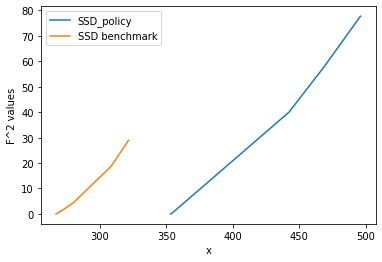

In [192]:
opt_ssd_benchmark = ssd_benchmark_from_table( x_1_opt, x_2_opt, scenario)
x_1,x_2 = three_stage_multi_item_SSD_newsvendor(x_1_0 = x_1_0, z_1_0 =z_1_0, scenario=scenario, \
                                benchmark = opt_ssd_benchmark , max_itr = 100,\
                                policy_return =  True)
u_eval = F2_policy_stage_2(x_1,x_2,scenario)
u_bcm = F2_policy_stage_2(x_1_opt, x_2_opt, scenario)

sort_keys = sorted(u_eval.keys())
sort_keys_bcm = sorted(u_bcm.keys())
plt.plot(sort_keys,[u_eval[_] for _ in sort_keys], label='SSD_policy')
plt.plot(sort_keys_bcm,[u_bcm[_] for _ in sort_keys_bcm], label='SSD benchmark')
plt.xlabel('x')
plt.ylabel('F^2 values')
plt.legend()
plt.show()

In [195]:
opt_ssd_benchmark = ssd_benchmark_from_table( x_1_opt, x_2_opt, scenario)
x_1,x_2 = three_stage_multi_item_SSD_newsvendor(x_1_0 = x_1_0, z_1_0 =z_1_0, scenario=scenario, \
                                benchmark = opt_ssd_benchmark , max_itr = 100,\
                                policy_return =  True)
eval_rst = evaluation_policy(x_1,x_2,scenario)
bcm_rst = evaluation_policy(x_1_opt, x_2_opt, scenario)



0 x_1:  [10.0, 0.0, 0.0, 8.249142840605666, 0.0, 10.0, 10.0, 0.0, 0.0, 0.0] z_1:  -281.245714
[]
[]
[]
[]
[]
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 127 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constrs, 72 vars, Parameter changes: LogToConsole=0> status: 3
1 x_1:  [10.0, 10.0, 0.0, 6.844692249933701, 0.0, 10.0, 10.0, 0.0, 10.0, 0.0] z_1:  -294.223461
<gurobi.Model Continuous instance reward_problem_two_stage_multi_item_SSD: 128 constr

In [153]:
u_eval['stage_3'][0]

{0: {'revenue': 475.0,
  'cost': 0,
  'current_tot_reward': 218.0,
  'prob': 0.24572219870000458},
 1: {'revenue': 750.0,
  'cost': 0,
  'current_tot_reward': 493.0,
  'prob': 0.1820638474572161},
 2: {'revenue': 453.0,
  'cost': 0,
  'current_tot_reward': 196.0,
  'prob': 0.31427676226668344},
 3: {'revenue': 509.0,
  'cost': 0,
  'current_tot_reward': 252.0,
  'prob': 0.0005177259599891837},
 4: {'revenue': 637.0,
  'cost': 0,
  'current_tot_reward': 380.0,
  'prob': 0.2574194656161067}}

In [157]:
z_1 = -u_eval['stage_1']['cost']
z_2 = u_eval['stage_2'][0]['revenue']-u_eval['stage_2'][0]['cost']
z_3 = [ u_eval['stage_3'][0][i]['revenue']+z_1+z_1-y_1-y_2 for i in range(L_scenario)] 
z_3

-190.0 -50.0
-67.0 -90.0


[235.0, 510.0, 213.0, 269.0, 397.0]

In [137]:
y_1 = opt_ssd_benchmark['stage_1']['r'][0]
y_2 = opt_ssd_benchmark['stage_2']['r'][0]
y_3 = opt_ssd_benchmark['stage_3']['r'][0]
y_3

[440.6666666666667,
 623.4166666666666,
 334.4166666666667,
 385.75,
 522.4166666666667]

In [158]:
sigma = z_1+z_2-y_1-y_2
print(z_1,y_1)
print(z_2,y_2)
print(sigma)

-190.0 -50.0
-67.0 -90.0
-117.0


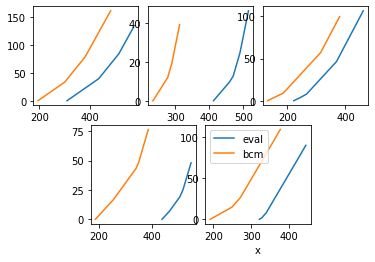

In [213]:
import matplotlib.pyplot as plt
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
axs = [ax1,ax2,ax3,ax4,ax5]
w_eval = F2_policy_stage_3(x_1,x_2,scenario)
w_bcm = F2_policy_stage_3(x_1_opt, x_2_opt, scenario)
plt.xlabel('x')
for i in range(scenario['S_scenario']):
    sort_keys = sorted(w_eval[i].keys())
    sort_keys_bcm = sorted(w_bcm[i].keys())
    axs[i].plot(sort_keys,[w_eval[i][_] for _ in sort_keys], label='eval')
    axs[i].plot(sort_keys_bcm,[w_bcm[i][_] for _ in sort_keys_bcm], label='bcm')

plt.legend()
plt.show()

In [131]:
opt_ssd_benchmark = ssd_benchmark_from_table( x_1_opt, x_2_opt, scenario)
x_1,x_2 = three_stage_multi_item_SSD_newsvendor(x_1_0 = x_1_0, z_1_0 =z_1_0, scenario=scenario,\
                                benchmark=opt_ssd_benchmark, max_itr = 20,\
                                policy_return =  True)
evaluation_ssd_optimal_rst = evaluation_policy(x_1,x_2,scenario)

max_0 440.6666666666667 295.0 [475.0, 750.0, 453.0, 509.0, 637.0] 33.420337774804516
max_0 623.4166666666666 295.0 [475.0, 750.0, 453.0, 509.0, 637.0] 161.85412833788152
max_0 334.4166666666667 295.0 [475.0, 750.0, 453.0, 509.0, 637.0] 0.0
max_0 385.75 295.0 [475.0, 750.0, 453.0, 509.0, 637.0] 16.13287379635641
max_0 522.4166666666667 295.0 [475.0, 750.0, 453.0, 509.0, 637.0] 79.24257693106041
max_1 440.6666666666667 295.0 [475.0, 750.0, 453.0, 509.0, 637.0] 33.420337774804516
max_1 623.4166666666666 295.0 [475.0, 750.0, 453.0, 509.0, 637.0] 161.85412833788152
max_1 334.4166666666667 295.0 [475.0, 750.0, 453.0, 509.0, 637.0] 0.0
max_1 385.75 295.0 [475.0, 750.0, 453.0, 509.0, 637.0] 16.13287379635641
max_1 522.4166666666667 295.0 [475.0, 750.0, 453.0, 509.0, 637.0] 79.24257693106041
max_0 373.0 395.0 [473.0, 532.0, 427.0, 487.0, 455.0] 0.0
max_0 452.125 395.0 [473.0, 532.0, 427.0, 487.0, 455.0] 39.28217071459241
max_0 374.0 395.0 [473.0, 532.0, 427.0, 487.0, 455.0] 0.07289725257720754


In [ ]:
rst = [ profit_distribution(),
        profit_distribution(evaluation_policy(x_1_dummy_SSD,x_2_dummy_SSD,scenario)), 
      ]
print(f"{'(S,L)':<6}|| {'dummy':<8} || {'dummy_SSD':<10} || probability(S=s, L=l|S=s)")
for _ in rst[0].keys():
    print(f"{_}:  {rst[0][_]['val']:<8} || {rst[1][_]['val']:<10} || {rst[2][_]['val']:<8} || {rst[3][_]['val']:<8} ||{rst[0][_]['prob']}")


In [197]:
def profit_distribution(evaluation_rst):
    profit = {}
    profit_1 = evaluation_rst['stage_1']['current_tot_reward'] 
    profit_2 = {}
    profit_3 = {}
    for i,dict_2 in evaluation_rst['stage_2'].items():
        profit_2[i] = dict_2['current_tot_reward']
        for j,dict_3 in evaluation_rst['stage_3'][i].items():
            profit_3[(i,j)] = {'val':dict_3['current_tot_reward'] ,\
                               'prob':(dict_2['prob'], dict_3['prob'])}
    return profit_3

In [75]:
###### evaluation reagrding SSD 
print('Policy: SSD, SSD benchmark:dummy')
x_1_dummy = x_1_generator(scenario)
benchmark_dummy = ssd_benchmark_from(x_1_dummy, x_2_i, scenario)
x_1_0 = x_1_random
z_1_0 = 0
x_1_dummy_SSD,x_2_dummy_SSD = three_stage_multi_item_SSD_newsvendor(x_1_0 = x_1_0, z_1_0 =z_1_0, scenario=scenario, \
                                benchmark=benchmark_dummy, max_itr = 20,\
                                policy_return =  True)

Policy: SSD, SSD benchmark:dummy


KeyboardInterrupt: 

In [70]:
evaluation_rst = evaluation_policy(x_1_dummy_SSD,x_2_dummy_SSD,scenario)
profit_distribution(evaluation_rst)

NameError: name 'x_1_dummy_SSD' is not defined

In [ ]:
x_2_dummy= [[x_2_i(x_1[j],d_2[j]) for j in range(n_item)] \
       for d_2 in scenario['stage_2']['rd_prob'][0][0] ]
evaluation_rst = evaluation_policy(x_1_dummy,x_2_dummy,scenario)
profit_distribution(evaluation_rst)

In [77]:
opt_ssd_benchmark = ssd_benchmark_from_table( x_1_opt, x_2_opt, scenario)
x_1,x_2 = three_stage_multi_item_SSD_newsvendor(x_1_0 = x_1_0, z_1_0 =z_1_0, scenario=scenario,\
                                benchmark=opt_ssd_benchmark, max_itr = 20,\
                                policy_return =  True)

0 ([6.0, 5.0, 6.0, 7.0, 9.0, 9.0, 9.0, 6.0, 6.0, 7.0], 155.0, 714.8730253933159, [0.0, 0.04465018234009488, 6.7255530677994875, 0.0, 8.0, 0.0, 0.0, 0.0, 4.0, 7.361425372885055], -0.0)
1 ([7.0, 6.0, 4.0, 9.0, 6.0, 9.0, 7.0, 7.0, 3.0, 8.0], 255.0, 726.1219851003699, [0.13695002255676814, 0.0, 8.0, 4.0, 4.4234938345541375, 0.0, 2.8336439587646796, 9.0, 4.0, 8.0], -0.0)
2 ([8.0, 8.0, 2.0, 8.0, 2.0, 9.0, 9.0, 7.0, 4.0, 6.0], 76.0, 625.3177335094022, [3.0, 0.0, 4.232523968524794, 0.0, 1.5169406570701967, 0.0, 0.0, 0.0, 4.0, 7.360838411824033], -0.0)
3 ([8.0, 9.0, 5.0, 4.0, 7.0, 9.0, 9.0, 9.0, 4.0, 4.0], 278.0, 774.1550971144327, [0.0, 4.0, 3.2147470962098437, 0.0, 8.0, 2.0, 4.0, 9.0, 3.1770930985539882, 2.72211045010286], -0.0)
4 ([6.0, 6.0, 6.0, 8.0, 5.0, 7.0, 8.0, 7.0, 7.0, 5.0], 125.0, 596.6341333488423, [0.15397103355855535, 2.1704099501447858, 6.194683139633286, 0.0, 0.0, 2.0, 0.0, 6.96712216682754, 3.310547911352323, 4.310547911352323], -0.0)
inf
Gurobi Optimizer version 9.5.1 build v9

In [206]:
rst = [ profit_distribution(eval_rst),
        profit_distribution(bcm_rst), 

      ]
print(f"{'(S,L)':<6}|| {'policy w SSD constraints':<20} || {'risk neutral policy':<20} || probability(S=s, L=l|S=s)")
for _ in rst[0].keys():
    print(f"{_}:  {round2(rst[0][_]['val']):<24} || {round2(rst[1][_]['val']):<20} ||{rst[0][_]['prob']}")


(S,L) || policy w SSD constraints || risk neutral policy  || probability(S=s, L=l|S=s)
(0, 0):  436.0                    || 300.666667           ||(0.22387847895810087, 0.24572219870000458)
(0, 1):  575.0                    || 483.416667           ||(0.22387847895810087, 0.1820638474572161)
(0, 2):  310.0                    || 194.416667           ||(0.22387847895810087, 0.31427676226668344)
(0, 3):  348.0                    || 245.75               ||(0.22387847895810087, 0.0005177259599891837)
(0, 4):  516.0                    || 382.416667           ||(0.22387847895810087, 0.2574194656161067)
(1, 0):  459.0                    || 233.0                ||(0.05187186573805417, 0.07289725257720754)
(1, 1):  515.0                    || 312.125              ||(0.05187186573805417, 0.1315484050847104)
(1, 2):  412.0                    || 234.0                ||(0.05187186573805417, 0.2045035698173737)
(1, 3):  470.0                    || 277.0                ||(0.05187186573805417, 0.3252096

In [73]:
def ssd_benchmark_from_table( x_1, x_2, scenario):
    
    n_item = scenario['n_item']
    S_scenario = scenario['S_scenario']
    L_scenario = scenario['L_scenario']
    d_2 = scenario['stage_2']['rd_prob'][0][0]
    prob_of_d_2 =  scenario['stage_2']['rd_prob'][0][1]
    
    d_3 = {}
    for s in range(S_scenario):
        d_3[s] = {}
        for l in range(L_scenario):
            d_3[s][l] = scenario['stage_3']['rd_prob'][s][0][l]
    
    prob_of_d_3 = {}
    for s in range(S_scenario):
        prob_of_d_3[s] = {}
        for l in range(L_scenario):
            prob_of_d_3[s][l] = scenario['stage_3']['rd_prob'][s][1][l]
    
    c_1 = scenario['stage_1']['cf']['c_1']
    c_2 = scenario['stage_2']['cf']['c_2']
    p_2 = scenario['stage_2']['cf']['p_2']
    p_3 = scenario['stage_3']['cf']['p_3']
    
    
    benchmark = {}
    benchmark['stage_1'] = {
        'r': [-sum(x_1[i]*c_1[i] for i in range(n_item))],
        's': [1.0]
    }
    
    
    benchmark['stage_2'] = {
        'r': [sum(p_2[i]*min(d_2[s][i],x_1[i])-c_2[i]*x_2[s][i] for i in range(n_item))\
                          for s in range(S_scenario)],
        's': prob_of_d_2
    }
    
    benchmark['stage_3'] = { 
        'r': { 
                s:[sum(p_3[i]*min( d_3[s][l][i], x_2[s][i]) for i in range(n_item)) \
                   for l in range(L_scenario)] for s in range(S_scenario)
        },
        's': { 
                s:prob_of_d_3[s] for s in range(S_scenario)
        }
    }
    
    return benchmark